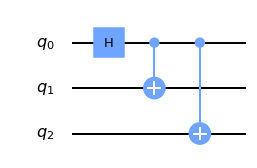

In [89]:
#### Python Notebook sandbox for Qiskit 
### Terra circuit construction
import numpy as np
import qiskit as q
%matplotlib inline

## Build a circuit that generates the GHZ state |GHZ>=(|000>+|111>)/sqrt(2)
circ = q.QuantumCircuit(3)

# Hadamard gate to induce superposition in qubit 0
circ.h(0)
# CNOT gate to entangle 0 (control) and 1 (target)
# Results in a Bell state |B>=(|00>+|11>)/sqrt(2)
circ.cx(0,1)
# CNOT gate to entangle 0 (control) and 2 (target)
# Results in a GHZ state |GHZ>=(|000>+|111>)/sqrt(2)
circ.cx(0,2)
circ.draw('mpl')

In [71]:
## Aer statevector simulation
from qiskit import Aer

# Simulate the results of the GHZ preparation circuit, a complex vector of dimension 2^n (n=number of qubits)
backend = Aer.get_backend('statevector_simulator')
job = execute(circ, backend)
result = job.result()

# Get the resulting state vector
outputstate = result.get_statevector(circ, decimals=3)
outputstate

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

In [120]:
## Visualization of statevectors are handled by matplotlib.figure.Figure objects.
## The available native visualizations are imported here
from qiskit.visualization import plot_state_city, plot_state_qsphere, plot_state_paulivec, plot_state_hinton, plot_bloch_multivector
# Plot components of the state density matrix
type(plot_bloch_multivector(outputstate))

matplotlib.figure.Figure

In [73]:
## Given a circuit with ONLY unitary operations, use the unitary_simulator backend 
## to calculate the 2^n X 2^n matrix of the circuit setup
unitary_backend = Aer.get_backend('unitary_simulator')
job = execute(circ, unitary_backend)
result = job.result()
unitary = result.get_unitary(circ, decimals=1)
unitary.shape

(8, 8)

In [90]:
## In practice, each run of the circuit needs to be measured, collapsing the qubits into a classical register
# This particular implementation seems unstable; repeated executions result in conflicting versions
circ.add_register(q.ClassicalRegister(3,'c'))
circ.barrier(range(3))
circ.measure(range(3),range(3))
circ.draw()

┌───┐           ░ ┌─┐      
q_0: ┤ H ├──■────■───░─┤M├──────
     └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
q_1: ─────┤ X ├──┼───░──╫─┤M├───
          └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
q_2: ──────────┤ X ├─░──╫──╫─┤M├
               └───┘ ░  ║  ║ └╥┘
c: 3/═══════════════════╩══╩══╩═
                        0  1  2

In [113]:
## The qasm_simualtor backend aggregates runs of the circuit execution, 
## each of which yield bitstrings of the form 'xyz', one classical bit each
qasm_backend = Aer.get_backend('qasm_simulator')

# Execute circuit runs and measurements 1024 times (also happens to be the default anyway)
job = execute(circ, qasm_backend)
result = job.result()

# Tally the counts of each generated state. Add each trial to an array
count_array = np.array([])
for x in range(3):
    counts = result.get_counts(circ)
    count_array = np.append(count_array, counts)
    
count_array

array([{'000': 505, '111': 519}, {'000': 505, '111': 519},
       {'000': 505, '111': 519}], dtype=object)

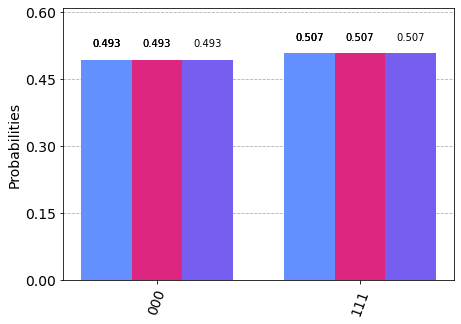

In [114]:
from qiskit.visualization import plot_histogram
plot_histogram(count_array)

In [ ]:
### 